# **Convolutional Neural Network**

In this lesson we will cover Neural Networks using the Sequential model. We will also build sequential models and Convolutional Neural Networks commonly used for image classification. First we will build an image classifier using dense layers only, then we will enhace the model by adding convolutional layers. Later we will use a pre-trained model and also tune the model.This lesson was taken from the book [Deep Learning with Python](https://learning.oreilly.com/library/view/deep-learning-with/9781617294433/OEBPS/Text/05.xhtml).

In [1]:
import numpy as np
import os

# model
from keras.models import Sequential

# layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

# pretarined model
from keras.applications import VGG16

# kekeras.applicationss
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard


# visual stuffs
import matplotlib.pyplot as plt

2023-10-31 14:22:32.959002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/carlos/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%%html
<img src='./images/Pixels.png', width=900, height=900>

[Image Source](https://learning.oreilly.com/library/view/python-machine-learning/9781787125933/ch15.html)

## Images

For the entire lesson we used the [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats/data) dataset from Kaggle.

In [3]:
train_cats_dir = './dogs_cats/train/cats'
train_dogs_dir = './dogs_cats/train/dogs'

In [4]:
len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir))

(500, 500)

In [5]:
cat_names = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

dog_names = [os.path.join(train_dogs_dir, fname) for
     fname in os.listdir(train_dogs_dir)]

In [6]:
cat_names[0]

'./dogs_cats/train/cats/cat.946.jpg'

In [7]:
dog_names[0]

'./dogs_cats/train/dogs/dog.775.jpg'

In [8]:
cat_path = cat_names[0] 
cat = image.load_img(cat_path, target_size=(150, 150))  

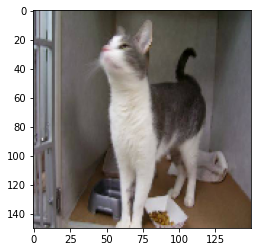

In [9]:
plt.imshow(cat)

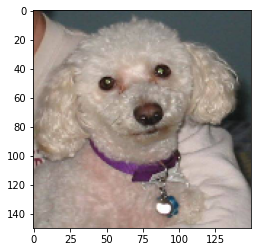

In [10]:
dog = image.load_img(dog_names[0], target_size=(150, 150))  
plt.imshow(dog)

In [11]:
type(cat)

PIL.Image.Image

In [12]:
cat = image.img_to_array(cat) 

In [13]:
type(cat)

numpy.ndarray

In [14]:
cat.shape

(150, 150, 3)

In [15]:
dog = image.img_to_array(dog) 

print('Type: {}'.format(type(dog)))
print("\nShape: {}".format(dog.shape))

Type: <class 'numpy.ndarray'>

Shape: (150, 150, 3)


## Image Classification with Dense Layers

As you may already know the neurons in a dense layer are not connected but are interconected with all neurons in prior and sud-sequent layers. Before proceeding into more detail I should first explain what python generators are why use generators to train neural networks.

In [16]:
%%html
<img src='../Week6_4.23/Multi_NN.png', width=700, height=700>

### Python Generators

In [17]:
def make_list(nums):
    
    my_list = [num for num in range(nums)]
    
    return my_list
    

In [18]:
my_list = make_list(5)

In [19]:
my_list

[0, 1, 2, 3, 4]

In [20]:
for i in my_list:
    print(i)

0
1
2
3
4


In [21]:
def make_generator(nums):
    
    for num in range(nums):
        yield num

In [22]:
make_gen = make_generator(5)

In [23]:
make_gen

<generator object make_generator at 0x7f80483e6cf0>

In [24]:
for i in make_gen:
    print(i)

0
1
2
3
4


In [25]:
for i in make_gen:
    print(i)

In [26]:
make_gen = make_generator(10)

In [27]:
for i in make_gen:
    print(i)

0
1
2
3
4
5
6
7
8
9


In [28]:
for i in make_gen:
    print(i)

### Preparing the Data

In [29]:
cat.shape

(150, 150, 3)

In [30]:
cat.max(), cat.min()

(251.0, 0.0)

In [31]:
train_dir = './dogs_cats/train'
valid_dir = './dogs_cats/valid'
test_dir = './dogs_cats/test'
model_logs = './dogs_cats/logs'

In [32]:
train_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

In [33]:
train_generator = train_gen.flow_from_directory(
                    train_dir, 
                    target_size=(150, 150), 
                    batch_size=20, 
                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
test_generator = test_gen.flow_from_directory(
                    test_dir, 
                    target_size=(150, 150), 
                    batch_size=20, 
                    class_mode='binary')

Found 200 images belonging to 2 classes.


In [35]:
valid_generator = test_gen.flow_from_directory(
                    valid_dir, 
                    target_size=(150, 150), 
                    batch_size=20, 
                    class_mode='binary')

Found 200 images belonging to 2 classes.


### Dense Layers Model

In [36]:
dog.shape

(150, 150, 3)

In [37]:
model_seq = Sequential()

model_seq.add(Dense(200, input_shape=(150, 150, 3), activation='relu'))
model_seq.add(Dense(200, activation='relu'))
model_seq.add(Flatten())
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [38]:
150*150*200

4500000

In [39]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150, 150, 200)     800       
                                                                 
 dense_1 (Dense)             (None, 150, 150, 200)     40200     
                                                                 
 flatten (Flatten)           (None, 4500000)           0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4500001   
                                                                 
Total params: 4541001 (17.32 MB)
Trainable params: 4541001 (17.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model_seq.fit(
    train_generator, 
    batch_size=25, 
    epochs=10, 
    validation_data=valid_generator, 
    validation_batch_size=10,
)

Epoch 1/10
50/50 [==============================] - 48s 932ms/step - loss: 0.9046 - acc: 0.5140 - val_loss: 0.6887 - val_acc: 0.5650
Epoch 2/10
50/50 [==============================] - 48s 961ms/step - loss: 0.6765 - acc: 0.5960 - val_loss: 0.6859 - val_acc: 0.5700
Epoch 3/10
50/50 [==============================] - 45s 908ms/step - loss: 0.6599 - acc: 0.6080 - val_loss: 0.6815 - val_acc: 0.5850
Epoch 4/10
50/50 [==============================] - 47s 938ms/step - loss: 0.6463 - acc: 0.6240 - val_loss: 0.7144 - val_acc: 0.5200
Epoch 5/10
50/50 [==============================] - 51s 1s/step - loss: 0.6337 - acc: 0.6380 - val_loss: 0.6765 - val_acc: 0.5950
Epoch 6/10
50/50 [==============================] - 47s 942ms/step - loss: 0.6185 - acc: 0.6620 - val_loss: 0.6724 - val_acc: 0.5750
Epoch 7/10
50/50 [==============================] - 52s 1s/step - loss: 0.6040 - acc: 0.6820 - val_loss: 0.6820 - val_acc: 0.5550
Epoch 8/10
50/50 [==============================] - 58s 1s/step - loss: 0.5

## Convolutional Neural Network (CNN)

Convolutional layers can be considered as filters that extract the important features from an image. Compared to dense layers, convolutional layers share the weights within a single layer. Convolutional layers work by first taking small patches then taking dot product of the patch and a kernel filter. After each convolution lthe heigh and width omage will shrink while the numbers of channels will increase. A simple explanation of how CNN work can be found [here](https://www.youtube.com/watch?v=x_VrgWTKkiM). More detailed explanation are found [here](https://learning.oreilly.com/videos/understanding-convolutional-neural/9781491978931/9781491978931-video312598).

In [41]:
%%html
<img src='./images/CNN.png', width=500, height=500>

In [42]:
%%html
<img src='./images/Pooling.png', width=700, height=700>

[Image Source](https://learning.oreilly.com/library/view/python-machine-learning/9781787125933/ch15.html)

In [43]:
%%html
<img src='./images/CNNFC.png', width=1000, height=1000>

[Image Source](https://www.kdnuggets.com/2016/11/intuitive-explanation-convolutional-neural-networks.html/3)

In [44]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_cnn.add(MaxPool2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPool2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPool2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(200, activation='relu'))
model_cnn.add(Dense(200, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [45]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [46]:
model_cnn.fit(
    train_generator, 
    batch_size=20, 
    epochs=10, 
    validation_data=valid_generator, 
    validation_batch_size=20,
    workers=8
)

Epoch 1/10
50/50 [==============================] - 18s 312ms/step - loss: 0.6924 - acc: 0.5120 - val_loss: 0.6918 - val_acc: 0.5000
Epoch 2/10
50/50 [==============================] - 15s 293ms/step - loss: 0.6914 - acc: 0.5140 - val_loss: 0.6912 - val_acc: 0.5500
Epoch 3/10
50/50 [==============================] - 14s 270ms/step - loss: 0.6881 - acc: 0.5470 - val_loss: 0.6918 - val_acc: 0.5000
Epoch 4/10
50/50 [==============================] - 13s 262ms/step - loss: 0.6861 - acc: 0.5360 - val_loss: 0.6937 - val_acc: 0.5100
Epoch 5/10
50/50 [==============================] - 14s 279ms/step - loss: 0.6841 - acc: 0.5590 - val_loss: 0.6863 - val_acc: 0.5800
Epoch 6/10
50/50 [==============================] - 14s 283ms/step - loss: 0.6794 - acc: 0.5700 - val_loss: 0.6852 - val_acc: 0.5800
Epoch 7/10
50/50 [==============================] - 14s 280ms/step - loss: 0.6727 - acc: 0.5880 - val_loss: 0.6819 - val_acc: 0.5450
Epoch 8/10
50/50 [==============================] - 16s 321ms/step - 

## CNN with Data Augmentation

In [47]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


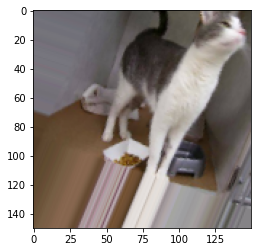

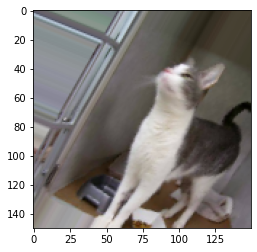

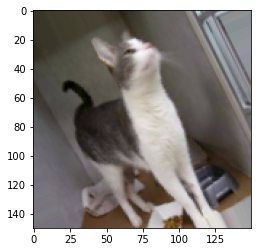

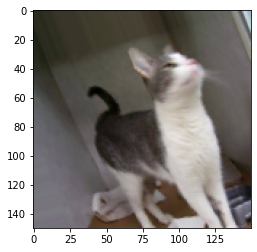

In [48]:
cat = image.img_to_array(cat)                                     
cat = cat.reshape((1,) + cat.shape)                                   

i = 0                                                           
for batch in datagen.flow(cat, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                    
    if i % 4 == 0:                                 
        break                                              

plt.show()

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)



In [50]:
train_generator = train_datagen.flow_from_directory(
        train_dir,                                          
        target_size=(150, 150),                             
        batch_size=32,
        class_mode='binary') 

Found 1000 images belonging to 2 classes.


In [65]:
model_cnn_aug = Sequential()

model_cnn_aug.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model_cnn_aug.add(MaxPool2D((2, 2)))
model_cnn_aug.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn_aug.add(MaxPool2D((2, 2)))
model_cnn_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn_aug.add(MaxPool2D((2, 2)))
model_cnn_aug.add(Flatten())
model_cnn_aug.add(Dense(200, activation='relu'))
model_cnn_aug.add(Dense(200, activation='relu'))
model_cnn_aug.add(Dense(1, activation='sigmoid'))

model_cnn_aug.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [66]:
model_cnn_aug.fit(
    train_generator, 
    steps_per_epoch=50, 
    epochs=10, 
    validation_data=valid_generator, 
    validation_batch_size=20,
    workers=42
)

Epoch 1/10
50/50 [==============================] - 22s 424ms/step - loss: 0.6924 - acc: 0.5057 - val_loss: 0.6924 - val_acc: 0.5150
Epoch 2/10
50/50 [==============================] - 18s 338ms/step - loss: 0.6906 - acc: 0.5355 - val_loss: 0.6907 - val_acc: 0.5200
Epoch 3/10
50/50 [==============================] - 55s 1s/step - loss: 0.6879 - acc: 0.5432 - val_loss: 0.6901 - val_acc: 0.5350
Epoch 4/10
50/50 [==============================] - 31s 530ms/step - loss: 0.6872 - acc: 0.5638 - val_loss: 0.6923 - val_acc: 0.5050
Epoch 5/10
50/50 [==============================] - 25s 478ms/step - loss: 0.6847 - acc: 0.5609 - val_loss: 0.6884 - val_acc: 0.5250
Epoch 6/10
50/50 [==============================] - 21s 410ms/step - loss: 0.6855 - acc: 0.5615 - val_loss: 0.6867 - val_acc: 0.5600
Epoch 7/10
50/50 [==============================] - 23s 445ms/step - loss: 0.6849 - acc: 0.5580 - val_loss: 0.6865 - val_acc: 0.5300
Epoch 8/10
50/50 [==============================] - 32s 607ms/step - los

## Fine Tunning a pre-Trained Model-VGG16

For small datasets we can use a pre-trained machine learning model and attach a fully connected dense layers at the top to enhance the task. Keras does provide with a set of pre-trained models, [Keras pre-trained CNN](https://keras.io/applications/). For this lesson we will use VGG 16 model.


In [67]:
vgg = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3))

In [68]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [69]:
vgg.trainable = True

set_trainable = False
for layer in vgg.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [70]:
model_vgg = Sequential()

model_vgg.add(vgg)
model_vgg.add(Flatten())
model_vgg.add(Dense(200, activation='relu'))
model_vgg.add(Dense(200, activation='relu'))
model_vgg.add(Dense(1, activation='sigmoid'))

model_vgg.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [71]:
model_vgg.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 200)               1638600   
                                                                 
 dense_19 (Dense)            (None, 200)               40200     
                                                                 
 dense_20 (Dense)            (None, 1)                 201       
                                                                 
Total params: 16393689 (62.54 MB)
Trainable params: 8758425 (33.41 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [72]:
tensorboard = TensorBoard(
  log_dir=model_logs,
  histogram_freq=1,
  write_images=True
)

In [73]:
model_vgg.fit(
    train_generator, 
    steps_per_epoch=10, 
    epochs=10, 
    validation_data=valid_generator, 
    callbacks=[tensorboard]
)

Epoch 1/10
10/10 [==============================] - 23s 2s/step - loss: 0.7293 - acc: 0.5439 - val_loss: 0.6221 - val_acc: 0.7600
Epoch 2/10
10/10 [==============================] - 63s 7s/step - loss: 0.7295 - acc: 0.5531 - val_loss: 0.6028 - val_acc: 0.7500
Epoch 3/10
10/10 [==============================] - 42s 4s/step - loss: 0.6149 - acc: 0.6438 - val_loss: 0.5097 - val_acc: 0.7950
Epoch 4/10
10/10 [==============================] - 39s 4s/step - loss: 0.5806 - acc: 0.6938 - val_loss: 0.5471 - val_acc: 0.6550
Epoch 5/10
10/10 [==============================] - 43s 4s/step - loss: 0.6447 - acc: 0.6926 - val_loss: 0.4241 - val_acc: 0.8700
Epoch 6/10
10/10 [==============================] - 53s 5s/step - loss: 0.5081 - acc: 0.7563 - val_loss: 0.3388 - val_acc: 0.9050
Epoch 7/10
10/10 [==============================] - 39s 4s/step - loss: 0.5280 - acc: 0.7625 - val_loss: 0.3643 - val_acc: 0.9050
Epoch 8/10
10/10 [==============================] - 35s 4s/step - loss: 0.4788 - acc: 0.77

In [74]:
model_vgg.evaluate(valid_generator)

10/10 [==============================] - 8s 767ms/step - loss: 0.2479 - acc: 0.9350


[0.2479342520236969, 0.9350000023841858]

In [75]:
model_vgg.evaluate(test_generator)

10/10 [==============================] - 11s 1s/step - loss: 0.2997 - acc: 0.8750


[0.2996551990509033, 0.875]

Fine tunning VGG16 in Kaggle Kernel, [here[https://www.kaggle.com/carlosezmez/cnn-cuny-tech-prep/edit]